### Building Blocks of PCA
1. Basis Transformation
2. Variance as information
3. Basis Transformation to Maximise Variance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#### Basis Transformation

We've already taken a look at basis transformation previously when we're discussing about linear transformations. Let's revisit this concept once more.

In [2]:
#Consider you've the coordinate information of a list of locations. 
a=[[1,2],[2,4],[3,6],[4,8],[5,10],[6,12],[7,14]]
b=['X','Y']
c = pd.DataFrame(a,columns = b)
c

,X,Y
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10
5,6,12
6,7,14


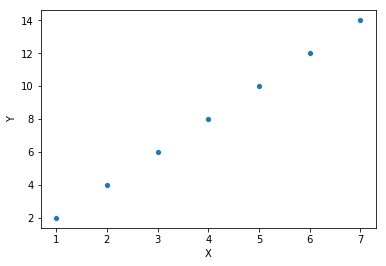

In [3]:
#Let's visualise to notice if any pattern exists
sns.scatterplot(x ='X', y='Y',data=c)

Clearly you can see that they follow a straight line pattern. Each datapoint needs two coordinates to be represented on this plane. Can we do something about it?

In [4]:
#Using the standard basis vectors you need two coordinates to represent this point.
#Now let's use a new basis i'(0.4472136,0.89442719), j'(0.89442719,-0.4472136 )
#These standard basis vectors have been chosen along the line and perpendicular to the line.

p = np.array([[0.4472136,0.89442719],[ 0.89442719,-0.4472136]])
p

array([[ 0.4472136 ,  0.89442719],
       [ 0.89442719, -0.4472136 ]])

In [5]:
#Now let's perform the basis transformation.
#We need to multiply p by each vector in the dataframe c.
C= p @ c.T
C.T

,0,1
0,2.236068,-1.000000e-08
1,4.472136,-2.000000e-08
2,6.708204,-3.000000e-08
3,8.944272,-4.000000e-08
4,11.180340,-5.000000e-08
5,13.416408,-6.000000e-08
6,15.652476,-7.000000e-08


In [9]:
D = pd.DataFrame(C.T)
D.columns = ['X','Y']
D['Y']=abs(round(D['Y']))
D

,X,Y
0,2.236068,0.0
1,4.472136,0.0
2,6.708204,0.0
3,8.944272,0.0
4,11.180340,0.0
5,13.416408,0.0
6,15.652476,0.0


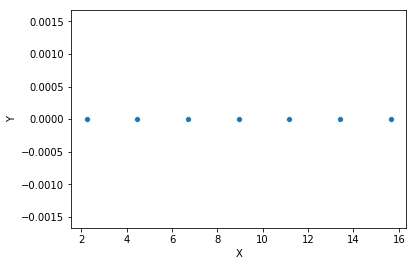

In [10]:
#Let's plot the scatterplot again.
sns.scatterplot(x='X',y='Y',data =D)

#### Now you can see that all the data points are aligned along the new X axis and have no values on the new Y axis. This is essentially what you achieve by doing basis transformation. You can simply represent every point on the new directions with fewer values. 

### Variance as information

The second important building block of PCA is the intuition that the more "varied" a column in a dataset is, the more information it captures. This means that the column which has a higher variance would be able to explain the observation points better than the ones with lower variance.

In [11]:
#Let's take a simple example to understand this.
#Again we take the location coordinates of a few points in a 2-D space.
a=[[1,2],[2,2.5],[3,3],[4,3.5],[5,4],[6,4.5],[7,5]]
b=['X','Y']
c = pd.DataFrame(a,columns = b)
c

,X,Y
0,1,2.0
1,2,2.5
2,3,3.0
3,4,3.5
4,5,4.0
5,6,4.5
6,7,5.0


In [12]:
#Let's calculate the variances of each of the columns now
np.var(c)

X    4.0
Y    1.0
dtype: float64

In [13]:
#Also the variance percentages
100*np.var(c)/sum(np.var(c))

X    80.0
Y    20.0
dtype: float64

The first column has a variance of 4 and the second column a variance of 1. 
What does that mean?

In [14]:
#This means that the first column is far more effective in explaining the variance in the entire dataset 
#Let's take another simpler example.
D

,X,Y
0,2.236068,0.0
1,4.472136,0.0
2,6.708204,0.0
3,8.944272,0.0
4,11.180340,0.0
5,13.416408,0.0
6,15.652476,0.0


In [15]:
np.var(D)

X    20.0
Y     0.0
dtype: float64

In [16]:
100*np.var(D)/sum(np.var(D))

X    100.0
Y      0.0
dtype: float64

As you can see 100% of the variance is explained by X and Y has no extra information to add at all.

### Basis Transformation to maximise variance

Now we reach the bread and butter of what PCA does. 

#### We find the basis vectors of those directions along which the variance is maximum!

In [17]:
#For example here is the original dataset that we started with
a=[[1,2],[2,4],[3,6],[4,8],[5,10],[6,12],[7,14]]
b=['X','Y']
c = pd.DataFrame(a,columns = b)
c

,X,Y
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10
5,6,12
6,7,14


In [18]:
#Let's calculate the variances now
100*np.var(c)/sum(np.var(c))

X    20.0
Y    80.0
dtype: float64

In [19]:
#Here's the transformed dataset
D

,X,Y
0,2.236068,0.0
1,4.472136,0.0
2,6.708204,0.0
3,8.944272,0.0
4,11.180340,0.0
5,13.416408,0.0
6,15.652476,0.0


In [20]:
#Let's calculate the variances once again
100*np.var(D)/sum(np.var(D))

X    100.0
Y      0.0
dtype: float64

The variances have now changed to 100 and 0. And this is at the heart of what PCA does!

### The basic steps of PCA are as follows
1. Find the basis vectors along which the variances are maximum
2. The basis vectors are orderered on the basis of variances.
3. This means the first basis vector would have the highest possible variance, the second basis vector would have the second highest variance and so on.
4. These basis vectors should also be orthonormal.
5. These are called the Prinicpal Components of the original dataset

In [22]:
a = np.array([[1,2],[2,2],[3,3],[4,5],[4,6]])
df = pd.DataFrame(a, columns=['x','y'])
np.var(df)

x    1.36
y    2.64
dtype: float64